In [5]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


import time

In [6]:
# Load dataset
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip"
!wget -q $data_url -O bank.zip
!unzip -o bank.zip

Archive:  bank.zip
  inflating: bank-full.csv           
  inflating: bank-names.txt          
  inflating: bank.csv                


In [7]:
df = pd.read_csv("bank.csv", sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [8]:
## Data Exploration and Cleaning
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None
age          0
job          0
marital      0
education    0
default      0
balance      0
hous

In [9]:
# Label Encoding for binary target variable
le = LabelEncoder()
df['y'] = le.fit_transform(df['y'])

In [10]:
# Convert categorical variables to dummies
df_encoded = pd.get_dummies(df.drop('y', axis=1), drop_first=True)
df_encoded['y'] = df['y']

In [11]:
# X, y data
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']


# mask = y.notna()
# Apply mask if needed for filtering
# X, y = X[mask], y[mask]

In [12]:

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
## Modeling and Evaluation
models = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    score = cross_val_score(model, X_train_scaled, y_train, cv=5).mean()
    results[name] = {
        "CV Score": score,
        "Report": classification_report(y_test, y_pred, output_dict=True),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }

In [15]:

# Print summary
for name, metrics in results.items():
    print(f"\nModel: {name}")
    print(f"Cross-Validation Score: {metrics['CV Score']:.4f}")
    print("Classification Report:")
    print(pd.DataFrame(metrics['Report']).transpose())
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])



Model: KNN
Cross-Validation Score: 0.8903
Classification Report:
              precision    recall  f1-score      support
0              0.904468  0.974274  0.938074  1205.000000
1              0.474576  0.184211  0.265403   152.000000
accuracy       0.885777  0.885777  0.885777     0.885777
macro avg      0.689522  0.579242  0.601739  1357.000000
weighted avg   0.856315  0.885777  0.862727  1357.000000
Confusion Matrix:
[[1174   31]
 [ 124   28]]

Model: Logistic Regression
Cross-Validation Score: 0.9049
Classification Report:
              precision    recall  f1-score      support
0              0.920410  0.969295  0.944220  1205.000000
1              0.579545  0.335526  0.425000   152.000000
accuracy       0.898305  0.898305  0.898305     0.898305
macro avg      0.749978  0.652410  0.684610  1357.000000
weighted avg   0.882229  0.898305  0.886061  1357.000000
Confusion Matrix:
[[1168   37]
 [ 101   51]]

Model: Decision Tree
Cross-Validation Score: 0.8584
Classification Report:
  

In [16]:

# Tree, HyperParams & fit
# Example: A small tree to demonstrate underfitting/overfitting control
tree_overfit = DecisionTreeClassifier(max_depth=2, min_samples_split=2, min_samples_leaf=1, random_state=42)
tree_overfit.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [17]:


# SCORE
train_acc = tree_overfit.score(X_train, y_train)
test_acc = tree_overfit.score(X_test, y_test)
print(f"\nDecision Tree (depth=2) Train Accuracy: {train_acc:.4f}")
print(f"Decision Tree (depth=2) Test Accuracy: {test_acc:.4f}")



Decision Tree (depth=2) Train Accuracy: 0.8989
Decision Tree (depth=2) Test Accuracy: 0.8961


In [18]:
# ROC Curve for best model (example: Logistic Regression)
best_model = LogisticRegression(max_iter=1000)
best_model.fit(X_train_scaled, y_train)
y_probs = best_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

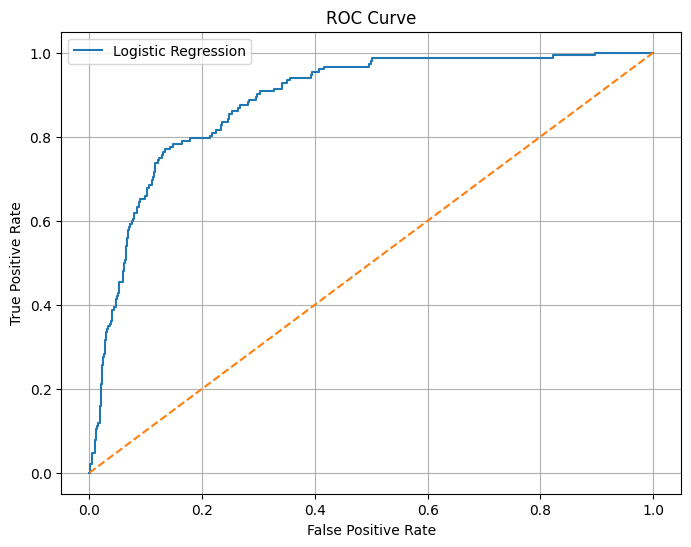

In [19]:



plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

